#Gender and Age Detection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path("/content/drive/MyDrive/Data")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [ ]:
print(len(filenames))
print(filenames[:3])

18314
['85_1_0_20170110183131183.jpg.chip.jpg', '67_0_0_20170120224536320.jpg.chip.jpg', '66_0_3_20170119180756808.jpg.chip.jpg']


# Data preprocessing

In [ ]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [ ]:
image_path

['35_1_1_20170116222717126.jpg.chip.jpg',
 '48_1_0_20170109011221762.jpg.chip.jpg',
 '42_0_1_20170117171124190.jpg.chip.jpg',
 '8_1_0_20170109202405671.jpg.chip.jpg',
 '88_1_0_20170110183050254.jpg.chip.jpg',
 '65_1_0_20170110123555351.jpg.chip.jpg',
 '48_0_0_20170113183719446.jpg.chip.jpg',
 '8_0_0_20170110220610016.jpg.chip.jpg',
 '20_1_4_20170104005353062.jpg.chip.jpg',
 '14_1_0_20170109204218773.jpg.chip.jpg',
 '1_0_2_20161219204848341.jpg.chip.jpg',
 '1_1_3_20161220145219616.jpg.chip.jpg',
 '26_1_3_20170117154601686.jpg.chip.jpg',
 '12_0_0_20170110225257257.jpg.chip.jpg',
 '27_1_1_20170117000109588.jpg.chip.jpg',
 '2_1_2_20161219161804134.jpg.chip.jpg',
 '25_0_0_20170117135538311.jpg.chip.jpg',
 '28_0_0_20170119155105218.jpg.chip.jpg',
 '15_1_0_20170109213511851.jpg.chip.jpg',
 '7_1_0_20170109202312260.jpg.chip.jpg',
 '43_0_0_20170117175406746.jpg.chip.jpg',
 '24_1_4_20170117150727939.jpg.chip.jpg',
 '28_0_0_20170113132654464.jpg.chip.jpg',
 '22_1_2_20170105183412088.jpg.chip.jpg'

# From Unstructured data to Structured data

In [ ]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

In [ ]:
df.head()

,image,age,gender
0,35_1_1_20170116222717126.jpg.chip.jpg,35,1
1,48_1_0_20170109011221762.jpg.chip.jpg,48,1
2,42_0_1_20170117171124190.jpg.chip.jpg,42,0
3,8_1_0_20170109202405671.jpg.chip.jpg,8,1
4,88_1_0_20170110183050254.jpg.chip.jpg,88,1


In [ ]:
gender_dict = {0:"Male",1:"Female"}

In [ ]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [ ]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


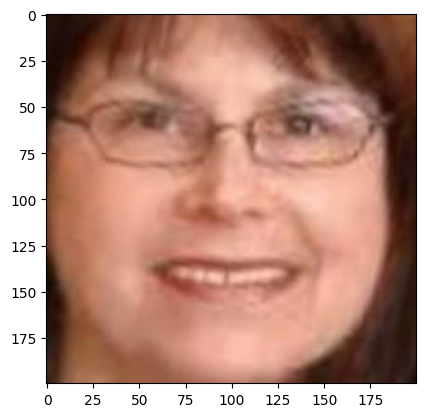

In [ ]:
img = Image.open("/content/drive/MyDrive/Data/"+df.image[1])
plt.imshow(img)

<ipython-input-13-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

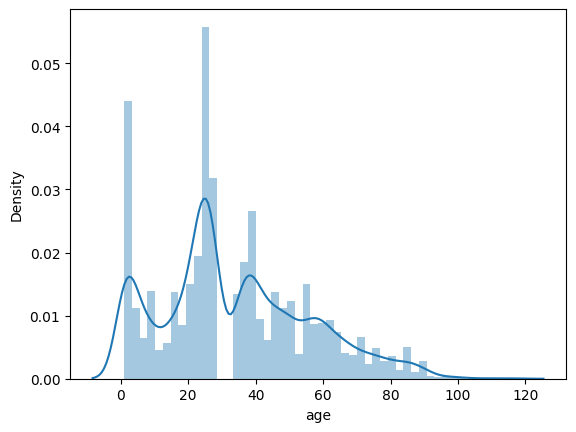

In [ ]:
sns.distplot(df.age)

# Plotting Images

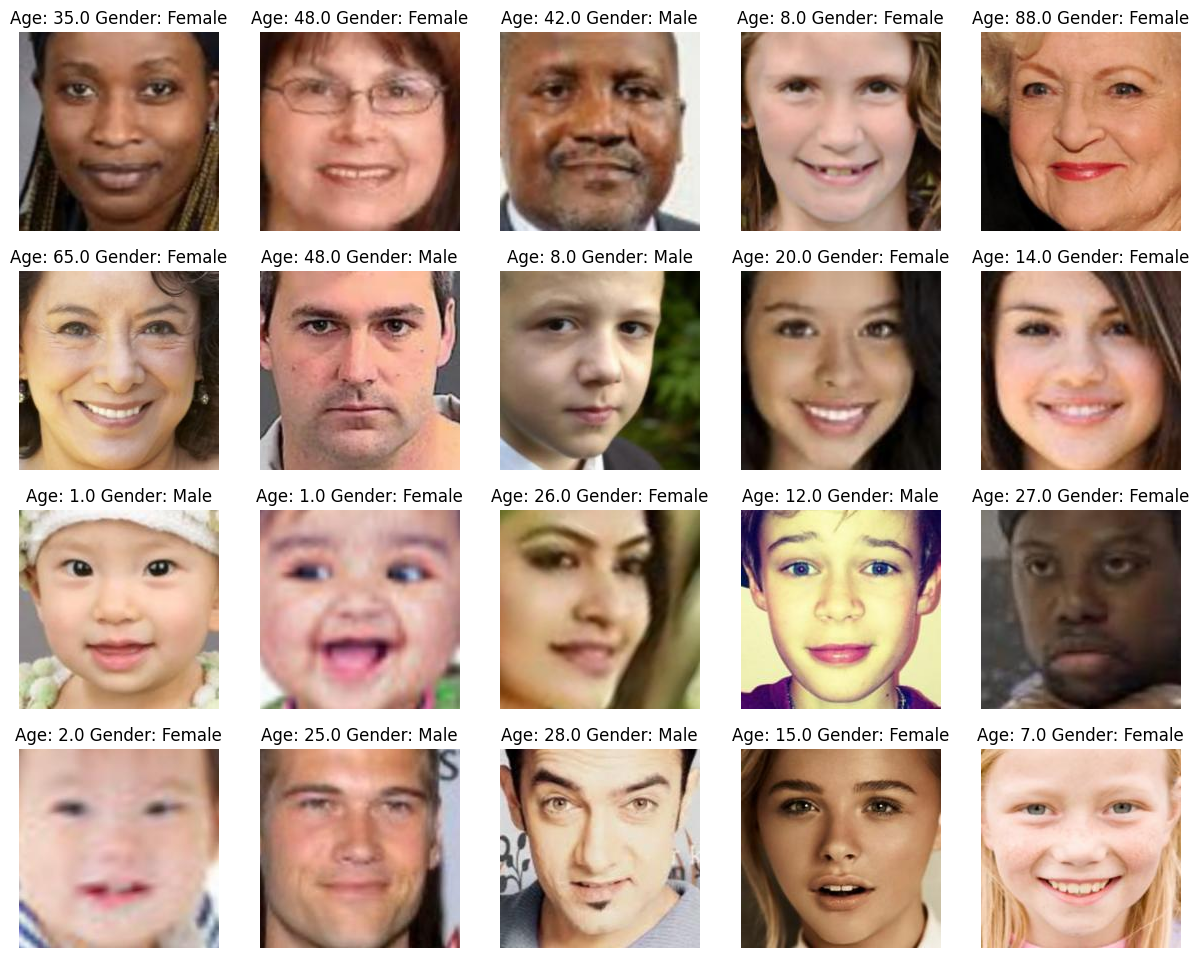

In [ ]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("/content/drive/MyDrive/Data/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
train, test = train_test_split(df, test_size=0.85, random_state=42)

In [ ]:
train.head()

,image,age,gender
6796,22_0_1_20170117020724763.jpg.chip.jpg,22.0,0
5808,45_0_3_20170104220631406.jpg.chip.jpg,45.0,0
16834,24_1_1_20170113013149199.jpg.chip.jpg,24.0,1
14163,1_1_4_20161221202153553.jpg.chip.jpg,1.0,1
6892,36_0_3_20170119201835557.jpg.chip.jpg,36.0,0


# Extracting Features

In [ ]:
#converting Image to numpy array (extracting feature)
x_train = []
for file in train.image:
    img = load_img("/content/drive/MyDrive/Data/"+file, grayscale=True)
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
<ipython-input-17-991e6d56db71>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


In [ ]:
x_train.shape

(2747, 128, 128, 1)

# Normalizing data

In [ ]:
x_train = x_train/255

In [ ]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [ ]:
input_size = (128,128,1)

# Creating model

Using Convolutional Neural Network but with skip connections.

In [ ]:
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [ ]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 126, 126, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 42, 42, 64)           0         ['batch_normalization[0][0

# Training the model

In [ ]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20
248/248 [==============================] - 201s 797ms/step - loss: 18.6920 - gender_output_loss: 0.7207 - age_output_loss: 17.9713 - gender_output_accuracy: 0.6416 - age_output_accuracy: 0.0562 - val_loss: 30.4762 - val_gender_output_loss: 0.6412 - val_age_output_loss: 29.8350 - val_gender_output_accuracy: 0.7127 - val_age_output_accuracy: 0.0400
Epoch 2/20
248/248 [==============================] - 183s 736ms/step - loss: 13.5197 - gender_output_loss: 0.5263 - age_output_loss: 12.9935 - gender_output_accuracy: 0.7411 - age_output_accuracy: 0.0502 - val_loss: 21.4240 - val_gender_output_loss: 0.5107 - val_age_output_loss: 20.9133 - val_gender_output_accuracy: 0.7636 - val_age_output_accuracy: 0.0400
Epoch 3/20
248/248 [==============================] - 180s 725ms/step - loss: 12.3857 - gender_output_loss: 0.4745 - age_output_loss: 11.9112 - gender_output_accuracy: 0.7646 - age_output_accuracy: 0.0295 - val_loss: 12.2343 - val_gender_output_loss: 0.3783 - val_age_output_loss:

# Predicting test image

Original: Gender =  Female  Age =  26.0
1/1 [==============================] - 0s 81ms/step
Prediction: Gender =  Female  Age =  24


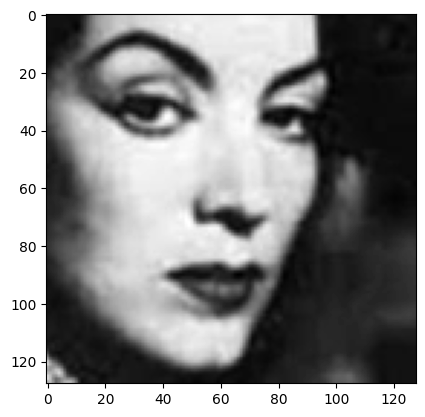

In [ ]:
index=34
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Male  Age =  24.0
1/1 [==============================] - 0s 107ms/step
Prediction: Gender =  Male  Age =  22


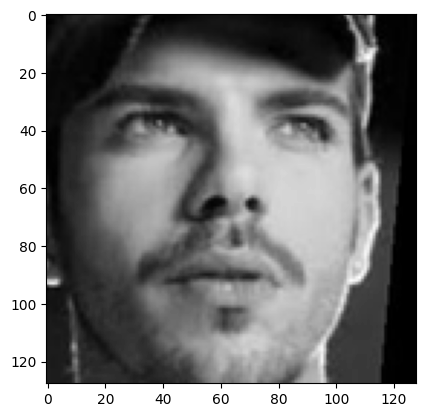

In [ ]:
index=20
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

# Visualizing loss

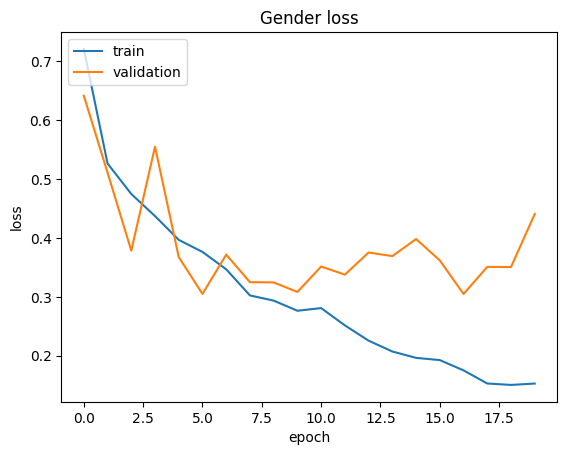

In [ ]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

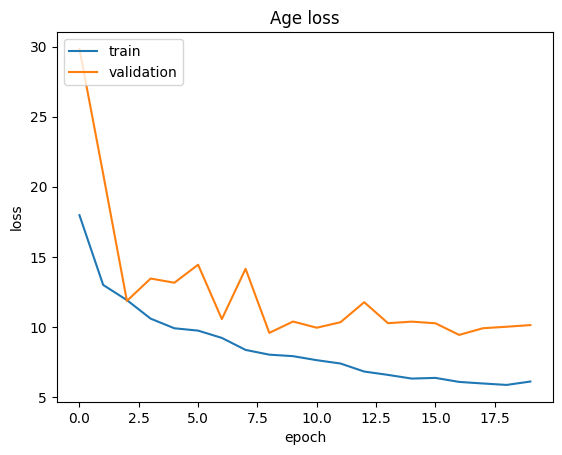

In [ ]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()